## Pembuka

Assalamu'alaikum warahmatullahi wabarakatuh.
Puji syukur kehadirat Allah Subhana Wata'ala atas limpahan Rahmat dan HidayahNya kepada kita semua.
Sholawat serta salam senantiasa tercurah limpahkan kepada baginda Muhammad Rasulullah Salallahualaihiwassalam.

Halo para **Pejuang Data**. Selamat berjumpa di pertemuan kesepuluh Program Training **Algoritma Machine Learning** Kelas Mahir.

Pada pertemuan ini kamu akan belajar:
* Fuzzy C Means Clustering
* Algoritma Fuzzy C Clustering
* Contoh Fuzzy C Means Clustering
* Fungsi Fuzzy C Means Clustering

## Fuzzy C-Means Clustering

Fuzzy c-means (FCM) adalah metode clustering yang memungkinkan satu bagian data menjadi milik dua atau lebih cluster. Metode ini (dikembangkan oleh Dunn pada tahun 1973 dan ditingkatkan oleh Bezdek pada tahun 1981) sering digunakan dalam pengenalan pola. Ini didasarkan pada minimalisasi fungsi tujuan berikut:


$$J=\sum \limits_{j=1} ^{k} \sum \limits_{i=1} ^{n} u_{ij} ^{m} \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} , 0 \leq m < \infty $$


dimana $m$ adalah bilangan real lebih dari 1 1, $u_{ij}$ adalah derajat keanggotaan dari $x_{i}$ di dalam klaster $j$, $x_{i}$ adalah data ke-i dalam dataset dengan dimensi d, $c_{j}$ adalah pusat klaster, dan $||*||$ bentuk norm yang menyatakan similaritas antara data dan pusat klaster data.

Partisi fuzzy dilakukan melalui optimasi iteratif dari fungsi tujuan yang ditunjukkan di atas, dengan pembaruan keanggotaan $u_{ij}$ dan pusat cluster $c_{j}$ dengan:

$$u_{ij} = \frac{1}{\sum \limits_{k=1} ^{c} \begin{pmatrix} \frac{\begin{Vmatrix} x_{i} - c_{j} \end{Vmatrix}}{\begin{Vmatrix} x_{i} - c_{k} \end{Vmatrix}}\end{pmatrix}^{\frac{2}{m-1}}} $$

$$ c_{j} = \frac{\sum \limits_{i=1} ^{N} u_{ij} ^{m} . x_{i}}{\sum \limits_{i=1} ^{N} u_{ij} ^{m}} $$

Iterasi ini akan berhenti ketika $\max_{ij} \begin{Bmatrix} \begin{vmatrix} u_{ij} ^{(k+1)} - u_{ij} ^{(k)} \end{vmatrix} \end{Bmatrix} < \epsilon $ di mana $\epsilon$ adalah kriteria terminasi antara 0 dan 1, sedangkan $k$ adalah langkah iterasi. Prosedur ini konvergen ke minimum lokal atau titik pelana $J_{m}$.

## Algoritma Fuzzy C-Means

1.	Menentukan parameter k dan m
2. 	Tentukan partisi pseudo – fuzzy awal, yaitu menetapkan nilai untuk semua $u_{i,j}$, yaitu $U=[u_{ij} ]$, $U^0$
3.  Pada iterasi ke-k, menghitung centroid dari setiap cluster menggunakan partisi fuzzy $C^{k}=[c_{j}]$ with $U^{k}$

$$ c_{j} = \frac{\sum \limits_{i=1} ^{N} u_{ij} ^{m} . x_{i}}{\sum \limits_{i=1} ^{N} u_{ij} ^{m}} $$

4. Perbaharui $U^{k}$, $U^{k+1}$
$$u_{ij} = \frac{1}{\sum \limits_{k=1} ^{c} \begin{pmatrix} \frac{\begin{Vmatrix} x_{i} - c_{j} \end{Vmatrix}}{\begin{Vmatrix} x_{i} - c_{k} \end{Vmatrix}}\end{pmatrix}^{\frac{2}{m-1}}} $$

5. Hitung fungsi objektif(SSE)

$$SSE=\sum \limits_{j=1} ^{k} \sum \limits_{i=1} ^{n} u_{ij} ^{m} \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} , 0 \leq m < \infty $$

6. Tetapkan klaster data berdasarkan tingkat keanggotaan tertinggi di $u_{ij}$
7. Ulangi langkah 3-6 sampai kriteria berhenti terpenuhi:
    1. Jumlah iterasi tertentu tercapai, ATAU
    2. Tidak ada (atau minimal) perbedaan anggota cluster pada dua iterasi terakhir, ATAU
    3. Tidak ada (atau minimum) perbedaan pusat cluster, ATAU
    4. Selisih SSE (Sum of Squared Error) minimum



## Contoh Fuzzy C-Means

**0. Dataset**

| $$x_1$$ | $$x_2$$ |
| :---: | :---: |
|   1   |   1   |
|   2   |   3   |
|   7   |   8   |
|   8   |   8   |

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.DataFrame({"x1":[1,2,7,8], "x2":[1,3,8,8]})
data

,x1,x2
0,1,1
1,2,3
2,7,8
3,8,8


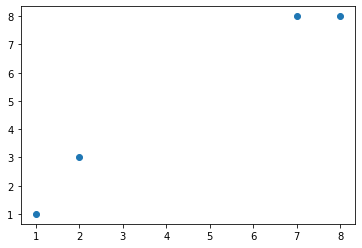

In [3]:
plt.scatter(data.x1, data.x2)

**1. Tentukan parameter k and m**

$$k=2$$ , $$m=2$$

In [4]:
k=2
m=2

**2. Menentukan matriks fuzzy pseudo partisi(u)**

| $$x_1$$ | $$x_2$$ |
| :---: | :---: |
|   0.65   |   0.35   |
|   0.72   |   0.28   |
|   0.20   |   0.80   |
|   0.89   |   0.11   |

In [5]:
U=np.array([[0.65,0.35],[0.72,0.28],[0.20,0.80],[0.89,0.11]])
U

array([[0.65, 0.35],
       [0.72, 0.28],
       [0.2 , 0.8 ],
       [0.89, 0.11]])

In [6]:
def Inisialisasi_Matriks_Fuzzy_Random(k,n):
    U = list()
    for i in range(n):
        random_num_list = [ random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [round(x/summation,2)for x in random_num_list]
        U.append(temp_list)
    np.array(U)
    return U

**3. Hitung centroid dari setiap cluster menggunakan partisi fuzzy**

In [7]:
def hitung_pusat_klaster(U, data):
    X=np.array(data)
    baris, kolom = np.shape(U)
    pusat_klaster=[]
    for k in range(kolom):
        pkb=[]
        for b in range(kolom):
            pk=np.dot(U[:,b]**m,X[:,k])/sum(U[:,b])
            pkb.append(pk)
        pusat_klaster.append(pkb)
    return pusat_klaster

In [8]:
pusat_klaster=hitung_pusat_klaster(U, data)
pusat_klaster

[[3.282967479674797, 3.153311688311688],
 [3.5099593495934958, 3.619805194805195]]

**4. Perbarui $U^{k}$, $U^{k+1}$**

In [9]:
def jarak_euclidean(x,y):
    return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

In [10]:
def jarak_centroid(df,pusat_klaster):
    n=len(df)
    k=np.array(pusat_klaster).shape[0]
    jarak=[]
    for i in range(n):
        x = list(df.iloc[i])
        jrk = [jarak_euclidean(x, pusat_klaster[j]) for j in range(k)]
        jarak.append(jrk)
    return np.array(jarak)

In [11]:
jc=jarak_centroid(data,pusat_klaster)
jc

array([[3.13826254, 3.62812282],
       [1.29209521, 1.63221804],
       [6.10792259, 5.60057946],
       [6.76319328, 6.27268456]])

In [12]:
def hitung_jum_baris(matriks):
    rows = len(matriks)
    cols = len(matriks[0])
    total=[]
    for x in range(0, rows):
        rowtotal=0
        for y in range(0, cols):
            rowtotal=rowtotal+(matriks[x][y])
        total.append(rowtotal)
    return total

In [13]:
def update_U(df,pusat_klaster):
    jc=jarak_centroid(df,pusat_klaster)
    baris, kolom=np.shape(jc)
    U=[]
    for k in range(kolom):
        ub=[]
        for b in range(baris):
            uj=1/((jc[b,k]/hitung_jum_baris(jc)[b])**(-1/(m-1)))
            ub.append(uj)
        U.append(ub)
    return np.array(U).transpose()

In [14]:
U_baru=update_U(data,pusat_klaster)
U_baru

array([[0.46380192, 0.53619808],
       [0.44184569, 0.55815431],
       [0.52166559, 0.47833441],
       [0.5188138 , 0.4811862 ]])

**5. Hitung fungsi objektif(SSE)**

In [15]:
def hitung_FO(U, df, pusat_klaster):
    jc=jarak_centroid(df,pusat_klaster)
    baris, kolom = np.shape(U)
    FO=[]
    for k in range(kolom):
        fob=[]
        for b in range(baris):
            fo=np.dot(U[b,k],jc[b,k])
            fob.append(fo)
        FO.append(fob)
    SSE=np.array(FO)
    return np.sum(SSE)

In [16]:
SSE=hitung_FO(U, data, pusat_klaster)
SSE

17.108328643324057

**6.Tetapkan klaster data berdasarkan tingkat keanggotaan tertinggi di $u_{ij}$**

In [17]:
def menentukan_klaster(U):
    n=len(U)
    label_klaster=list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(U[i]))
        label_klaster.append(idx)
    return label_klaster

In [18]:
label_hasil=menentukan_klaster(U_baru)
label_hasil

[1, 1, 0, 0]

**7. Ulangi langkah 3-6 sampai kriteria berhenti terpenuhi:**

In [19]:
def perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru):
    perubahan = 0
    for a,b in zip(pusat_klaster_lama, pusat_klaster_baru):
        perubahan+=jarak_euclidean(a,b)
    return perubahan

## Fungsi Fuzzy C Means

In [20]:
data=pd.DataFrame({"x1":[1,2,7,8], "x2":[1,3,8,8]})
data

,x1,x2
0,1,1
1,2,3
2,7,8
3,8,8


In [21]:
def FCM(df): 
    X=np.array(df)
    k = 2
    MAX_ITER = 1000
    n = len(df)
    m = 2.00
    U = Inisialisasi_Matriks_Fuzzy_Random(k,n)
    U = np.array(U)
    iterasi = 0
    label=[]
    fungsi_objektif=[0]
    label_hasil=[]
    
    while iterasi < MAX_ITER:
        pusat_klaster = hitung_pusat_klaster(U, df)
        U= update_U(df,pusat_klaster)
        fo= hitung_FO(U, df, pusat_klaster)
        fungsi_objektif.append(fo)
        label_klaster = menentukan_klaster(U)
        label.append(label_klaster)
        label_hasil=label[-1]
        iterasi += 1
    return label_hasil, fungsi_objektif, iterasi

In [22]:
label_hasil, fungsi_objektif, iterasi=FCM(data)

In [23]:
print(label_hasil)

print(iterasi)

[1, 0, 0, 0]
1000


In [24]:
import plotly.express as px
x=np.arange(1,len(fungsi_objektif))
y=fungsi_objektif[1:]
dfplot = pd.DataFrame({'x':x, 'y':y})
dfplot.head()
fig = px.line(dfplot, x="x", y="y", title='Fungsi Objektif')
fig.show()

## Latihan

Diberikan Dataset

In [25]:
data=pd.DataFrame({"Province Name":["Jakarta", "Jawa Tengah", "Bali", "Sumatera Selatan", "Kalimantan Timur", "Maluku"], 
                   "Confirmed":[1231, 1452, 789, 201, 78, 45], 
                   "Death":[10, 35, 8, 2, 1, 0]})
data_used=data[["Confirmed", "Death"]]
data_used

,Confirmed,Death
0,1231,10
1,1452,35
2,789,8
3,201,2
4,78,1
5,45,0


In [26]:
# Cluster the dataset above using Fuzzy C-Means clustering into 2 cluster.

label_hasil, fungsi_objektif, iterasi=FCM(data_used)

In [27]:
label_hasil

[1, 1, 1, 0, 0, 0]

In [28]:
fungsi_objektif

[0,
 4163.620708174872,
 4793.724816900847,
 4579.7048765750205,
 4614.198292077401,
 4606.1115639960135,
 4607.69039489173,
 4607.35315669982,
 4607.422019207559,
 4607.407639345087,
 4607.410608683927,
 4607.409992096761,
 4607.410119774258,
 4607.410093298935,
 4607.410098785048,
 4607.4100976478385,
 4607.410097883527,
 4607.410097834676,
 4607.410097844802,
 4607.410097842702,
 4607.410097843138,
 4607.410097843048,
 4607.410097843067,
 4607.410097843062,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843063,
 4607.410097843

In [29]:
iterasi

1000